# CIFAR-10 Object Recognition in Color Images RGB



### Goal

For this project, we work with work with theCIFAR-10 obtained from Kaggle: https://www.kaggle.com/c/cifar-10. Using a Deep Learning neural network, our goal here will be to predict if the image is a:

0 = airplane										
1 = automobile										
2 = bird										
3 = cat										
4 = deer										
5 = dog										
6 = frog										
7 = horse										
8 = ship										
9 = truck

### The Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.



# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset

Since the data is already split lets unpack it with x_train, y_train,x_test, y_test

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# The data

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

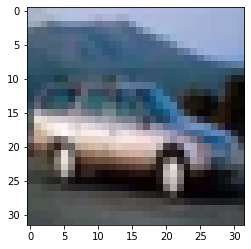

In [5]:
plt.imshow(X_train[4])

# Exploratory Data Analysis

Exploratory data analysis! Since we will be attempting to predict the digit on images, lets create some plot in order to get a better comprehension of the dataset.

## Checking for data distribution with test data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


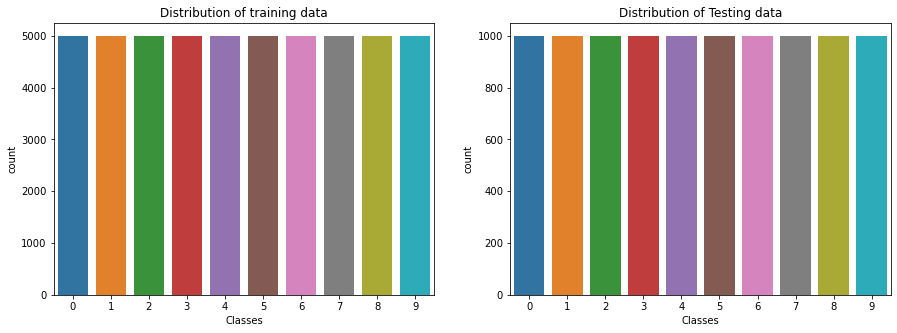

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

Looks like its pretty even

## Checking for NULL value

In [7]:
X_train[np.isnan(X_train)]

array([], dtype=uint8)

# Data Processing

We now need to make sure the labels will be understandable by our CNN since its a categorical probleme and we dont want to model to think the test set is continous variable

## Encoding Our output

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
print(y_train)
print(y_test)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [10]:
print(y_train.shape)

(50000, 1)


In [11]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

now that we encoded the output, our model will understand that we want to perform a multiclass probleme

## Scalling X (3d array with MinMax Scaller)

Since we max number is 255, lets devide X by it for us to have number dans range from 0 to 1

In [13]:
print(X_train.min())
print(X_train.max())

0
255


In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
scaled_single = X_train[4]

In [16]:
scaled_single

array([[[0.66666667, 0.70588235, 0.77647059],
        [0.65882353, 0.69803922, 0.76862745],
        [0.69411765, 0.7254902 , 0.79607843],
        ...,
        [0.63529412, 0.70196078, 0.84313725],
        [0.61960784, 0.69803922, 0.83921569],
        [0.61568627, 0.69411765, 0.83137255]],

       [[0.65882353, 0.70980392, 0.77647059],
        [0.6745098 , 0.7254902 , 0.78823529],
        [0.67058824, 0.71764706, 0.78431373],
        ...,
        [0.62352941, 0.69411765, 0.83137255],
        [0.61176471, 0.69019608, 0.82745098],
        [0.60392157, 0.68235294, 0.81960784]],

       [[0.60392157, 0.66666667, 0.72941176],
        [0.58431373, 0.64705882, 0.70980392],
        [0.50588235, 0.56470588, 0.63529412],
        ...,
        [0.63137255, 0.69803922, 0.83921569],
        [0.61568627, 0.69411765, 0.83137255],
        [0.60392157, 0.68235294, 0.81960784]],

       ...,

       [[0.29019608, 0.32941176, 0.31372549],
        [0.29803922, 0.33333333, 0.31764706],
        [0.30588235, 0

In [17]:
print(scaled_single.max())
print(scaled_single.min())

0.996078431372549
0.0


### Making sure data is good and ready for the  model 

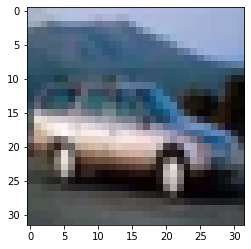

In [18]:
plt.imshow(scaled_single)

## No need to reshaping the Data since dimention is already 3 and we are dealing with Color RGB

In [19]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Creating CNN Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [21]:
model = Sequential()


model.add(Conv2D(filters=96, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))





model.add(Flatten())


model.add(Dense(1024, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## CNN Model info

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 96)        4704      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        98368     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

## Fit CNN

In [24]:
model.fit(X_train,y_cat_train,epochs=25,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/25
1563/1563 [==============================] - 110s 70ms/step - loss: 1.8147 - accuracy: 0.3214 - val_loss: 1.3278 - val_accuracy: 0.5183
Epoch 2/25
1563/1563 [==============================] - 115s 73ms/step - loss: 1.3030 - accuracy: 0.5279 - val_loss: 1.2348 - val_accuracy: 0.5640
Epoch 3/25
1563/1563 [==============================] - 117s 75ms/step - loss: 1.1703 - accuracy: 0.5814 - val_loss: 1.1534 - val_accuracy: 0.5983
Epoch 4/25
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0745 - accuracy: 0.6211 - val_loss: 1.0967 - val_accuracy: 0.6151
Epoch 5/25
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9845 - accuracy: 0.6489 - val_loss: 1.0531 - val_accuracy: 0.6309
Epoch 6/25
1563/1563 [==============================] - 121s 78ms/step - loss: 0.9306 - accuracy: 0.6721 - val_loss: 0.9903 - val_accuracy: 0.6577
Epoch 7/25
1563/1563 [==============================] - 119s 76ms/step - loss: 0.8809 - accuracy: 0.6889 - val_loss: 0

Early stop made us stop training at 12 epoch

## Evaluate the Model

In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.596342,0.41160,1.327777,0.5183
1,1.273653,0.53918,1.234779,0.5640
2,1.150259,0.59254,1.153413,0.5983
3,1.062676,0.62452,1.096710,0.6151
4,0.988534,0.65000,1.053062,0.6309


### Checking overfit with loss metric and accuracy

<AxesSubplot:>

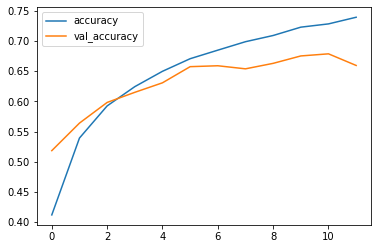

In [27]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

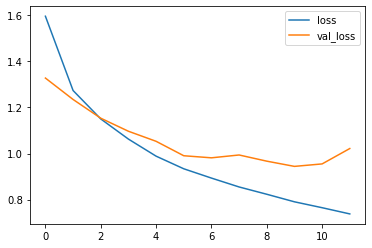

In [28]:
losses[['loss','val_loss']].plot()

In [29]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0216842889785767, 0.6596999764442444]


## Prediction with test set

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
predictions = model.predict_classes(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1000
           1       0.78      0.80      0.79      1000
           2       0.62      0.48      0.54      1000
           3       0.57      0.34      0.43      1000
           4       0.56      0.69      0.62      1000
           5       0.61      0.54      0.57      1000
           6       0.77      0.66      0.71      1000
           7       0.71      0.72      0.71      1000
           8       0.77      0.76      0.76      1000
           9       0.62      0.86      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [33]:
confusion_matrix(y_test,predictions)

array([[756,  25,  35,   4,  17,   7,   8,   8,  78,  62],
       [ 33, 798,   1,   4,   2,   2,   2,   2,  24, 132],
       [128,  13, 483,  36, 119,  71,  56,  42,  28,  24],
       [ 48,  28,  66, 343, 111, 178,  62,  53,  36,  75],
       [ 51,   5,  59,  29, 690,  29,  30,  71,  12,  24],
       [ 25,  13,  51, 113,  84, 542,  26,  83,  19,  44],
       [ 32,  22,  48,  42, 105,  23, 658,  14,   6,  50],
       [ 39,   6,  27,  26,  89,  40,   6, 716,   4,  47],
       [112,  45,   2,   3,   7,   2,   2,   5, 755,  67],
       [ 30,  62,   6,   3,   5,   1,   6,  10,  21, 856]], dtype=int64)

# Trying prediction with a single image

In [40]:
Single_image = X_test[2]

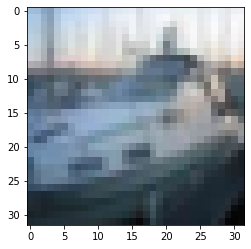

In [41]:
plt.imshow(Single_image)

In [43]:
print(model.predict_classes(Single_image.reshape(1,32,32,3)))

[8]


#8 is a ship

# Conclusion
since its a multiclass probleme with 10 posible awnser, we have a 10% chance of guessing the awnser. The model have an overall accuracy of 66%. We also can see that Cats(#3) and dogs(#5) prediction didnt perform well with a repective 0.43 and 0.57. This might be because a poor resolution of 32X32 and the fact that dogs and cats are similar in shape is giving trouble to the computer.